## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('../data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id .nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [7]:
1928 + 1965

3893

We have 1928 times for "control and new page" + 1965 times for "treatment and old page". So, a total of 3893.

f. Do any of the rows have missing values?

In [8]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[((df['group'] =='control') & (df['landing_page'] == 'old_page')) | ((df['group'] =='treatment') & (df['landing_page'] == 'new_page'))]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
df2.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id .nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.user_id .duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.user_id .duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df2.drop_duplicates(subset="user_id")

In [17]:
#Checking result
df2.count()

user_id         290584
timestamp       290584
group           290584
landing_page    290584
converted       290584
dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
p_control = df2[df2['group'] =='control'].converted.mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
p_treatment = df2[df2['group'] =='treatment'].converted.mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
total = df2.count()['user_id']
(df2.groupby(['landing_page']).count()['user_id'] / total).reset_index()

,landing_page,user_id
0,new_page,0.500062
1,old_page,0.499938


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [22]:
#Calculate the difference between treatment and control
obs_diff = p_treatment - p_control
obs_diff

-0.0015782389853555567

**Answer**

When we analyse the convertion probabilty for old and new page, we can notice that the old page have a greater convertion. In this case, we don't have sufficiente evidence to say that the new treatment page leads to more convertions. But, we need to confirm this with an A/B test.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0:** 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 >= 0

**H1:** 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 < 0

$\alpha$ = 0.05

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

Here, I am assuming that it is equal to the rate converted to ab_data.csv, regardless of the page. And that the values of 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑 are equal.

c. What is $n_{new}$?

In [25]:
n_new = df2[df2['group'] =='treatment'].count()['user_id']
n_new

145310

d. What is $n_{old}$?

In [26]:
n_old = df2[df2['group'] =='control'].count()['user_id']
n_old

145274

The n refers to the sample size.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([0,1], size = n_new, p=[(1-p_new),p_new])
new_page_converted.mean()

0.12007432385933521

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([0,1], size = n_old, p=[(1-p_old),p_old])
old_page_converted.mean()

0.12022798298387874

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
simulated_p_new = new_page_converted.mean()
simulated_p_old = old_page_converted.mean()
simulated_p_new - simulated_p_old 

-0.0001536591245435287

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([0,1], size = n_new, p=[(1-p_new),p_new])
    old_page_converted = np.random.choice([0,1], size = n_old, p=[(1-p_old),p_old])
    simulated_p_new = new_page_converted.mean()
    simulated_p_old = old_page_converted.mean()
    difference =simulated_p_new - simulated_p_old 
    p_diffs.append(difference)

In [31]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

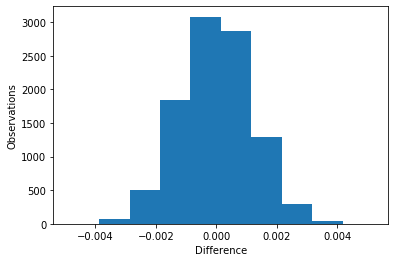

In [32]:
plt.hist(p_diffs)
plt.xlabel('Difference')
plt.ylabel('Observations');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
p_value = (p_diffs > obs_diff).mean()
p_value

0.9077

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answers**

- In part j, I verified that each observed conversion difference in our hypothesis test is greater than the sample conversion difference. When calculating the proportion for this comparison, we have what is called p_value.

- The p_value is the probability of observing the statistic (conversion difference in this case) if the null hypothesis is true.

- We define 𝛼 as 0.05. This means that we can make 5% type 1 errors. Verifying that the p_value is equal to 0.90, based on the data and the percentage of type 1 error defined, we failed to reject the null, which states that the conversion of the old page is greater than or equal to that of the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = df2[(df2['group'] =='control') & (df2['converted'] == 1)].count()['user_id']
convert_new = df2[(df2['group'] =='treatment') & (df2['converted'] == 1)].count()['user_id']
n_old = df2[df2['group'] =='control'].count()['user_id']
n_new = df2[df2['group'] =='treatment'].count()['user_id']

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
#Using proportions ztest to compute values
stats, p_val = sm.stats.proportions_ztest(count = [convert_old,convert_new], nobs = [n_old,n_new], alternative='larger')

In [36]:
#Print results
print ('zscore = ' + str(stats), 'p-value = ' + str(p_val))

zscore = 1.3109241984234394 p-value = 0.09494168724097551


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answers**
- Analyzing the z score, with the help of table z, we can validate a confidence interval of 90.46%.

- The p-value returned is 0.094 because it uses the alternative parameter as the largest and this gives us a proportion of cases where the alternative hypothesis would be true, in this case 9.4%.

- These results are available with those identified in parts j and k and give us a conclusion of the failure to reject a null.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

As we have to predict two possibilities of results (converted or no converted), logistic regression fits better

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept'] = 1
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [38]:
#Need to drop the control column
df2.drop('control', axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        13:37:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answers**
- The p value for ab_page is 0.19
- The p-value found in part II considered a null hypothesis that the conversion difference between the old page and the new page was greater than or equal to 0, whereas in the logistic regression we did not evaluate this condition. Being different hypotheses, it makes sense for the p-value to be different.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answers**

There are some factors that can influence user conversion, such as:
- Seasonality: a user can convert because it is at any time of the year that makes sense (for example, buying a Christmas present)
- Age: The age of users can affect the conversion
depending on the type of page it receives.
- Bias: it is important to take into account the biases of an a / b test, as this can affect the user's conversion decision, whether deciding not to convert because they are dissatisfied with the change (Change Aversion) or converting because they are enthusiastic about a new page (Novelty Effect)

By adding additional terms to the regression model, we have the disadvantages bellow:
- Possible decrease in the confidence interval
- Greater difficulty in interpreting results

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
countries_df = pd.read_csv('../data/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner').reset_index()
df_new.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [42]:
df_new.groupby('country').count()['user_id']

country
CA     14499
UK     72466
US    203619
Name: user_id, dtype: int64

How we have 

In [43]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.drop('CA',axis=1,inplace=True) #as we have less CA observations, this will be the dummy variable that I will remove from the dataset
df_new.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
### Fit Your Linear Model And Obtain the Results
log_mod2= sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK','US']])
results2 = log_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        13:37:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**Answer**

The country has no effect on convertion. Because:
- When we run the model using the country, the p value for ab_page is still not statistically significant, changing from 0.190 to 0.191
- The p value for countries is bigger then 0.05, so they are not statistically significant
 

<a id='conclusions'></a>
## Conclusions

All tests performed on this notebook gave us statistical evidence of failure to reject the null hypothesis. Therefore, we have come to the conclusion that the new page does not convert more than the old page. So, it is not recommended to launch the new page in production, as this can reduce profits.